🔹 First 5 Rows:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

🔹 Dataset Shape: (545, 13)

🔹 Column Names:
 ['price', 'area', 'bedrooms', 'bathr

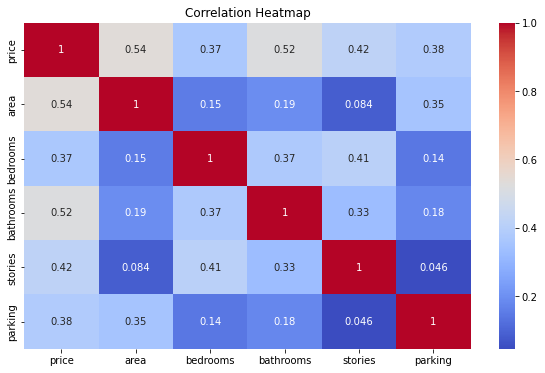

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv(r"C:\Users\Pranav\Downloads\archive (5).zip")  # Replace with your actual CSV file path

# Basic Info
print("🔹 First 5 Rows:\n", df.head())
print("\n🔹 Dataset Shape:", df.shape)
print("\n🔹 Column Names:\n", df.columns.tolist())
print("\n🔹 Data Types:\n", df.dtypes)
print("\n🔹 Missing Values:\n", df.isnull().sum())
print("\n🔹 Descriptive Statistics:\n", df.describe(include='all'))

# Checking for duplicates
print("\n🔹 Duplicated rows:", df.duplicated().sum())




# Select only numeric columns for correlation
numerical_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print("\n🔹 Correlation Matrix:\n", correlation_matrix)

# Plot correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()





🔹 Original shape: (545, 13)
🔹 After dropping NAs: (545, 13)

🔹 MAE: 920392.94
🔹 MSE: 1523019469501.29
🔹 R² Score: 0.65

🔹 Model Coefficients:
                             Feature   Coefficient
2                         bathrooms  1.114751e+06
9               airconditioning_yes  6.858393e+05
8               hotwaterheating_yes  6.163754e+05
10                     prefarea_yes  5.091921e+05
7                      basement_yes  4.826035e+05
3                           stories  4.172676e+05
5                      mainroad_yes  4.080737e+05
12     furnishingstatus_unfurnished -3.911912e+05
4                           parking  3.031112e+05
6                     guestroom_yes  2.757105e+05
11  furnishingstatus_semi-furnished -1.216527e+05
1                          bedrooms  8.089314e+04
0                              area  2.532873e+02


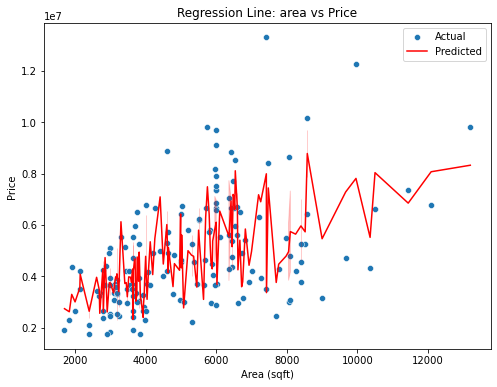

In [16]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load your dataset
df = pd.read_csv(r"C:\Users\Pranav\Downloads\archive (5).zip")  # ⬅️ Replace with actual file name

# 3. Preprocessing
print("🔹 Original shape:", df.shape)
df.dropna(inplace=True)
print("🔹 After dropping NAs:", df.shape)

# 4. Encode categorical variables using one-hot encoding
categorical_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning',
    'prefarea', 'furnishingstatus'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. Define features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 7. Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# 8. Predict and evaluate
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n🔹 MAE: {mae:.2f}")
print(f"🔹 MSE: {mse:.2f}")
print(f"🔹 R² Score: {r2:.2f}")

# 9. Show coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})
print("\n🔹 Model Coefficients:\n", coefficients.sort_values(by='Coefficient', key=abs, ascending=False))

# 10. Plot regression line for one feature (e.g., area vs price)
feature = 'area'

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test[feature], y=y_test, label='Actual')
sns.lineplot(x=X_test[feature], y=lr.predict(X_test), color='red', label='Predicted')
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.title(f'Regression Line: {feature} vs Price')
plt.legend()
plt.show()



🔹 MAE: 1127483.35
🔹 MSE: 2292721545725.36
🔹 R² Score: 0.546

🔹 Coefficients:
      Feature   Coefficient
1  bathrooms  1.185732e+06
2    stories  4.951008e+05
4    parking  3.376608e+05
3   bedrooms  1.512468e+05
0       area  3.088670e+02


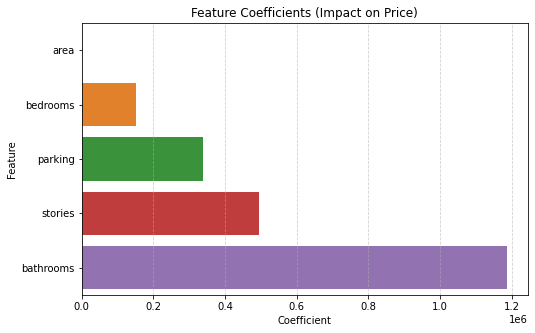

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and clean dataset
df = pd.read_csv(r"C:\Users\Pranav\Downloads\archive (5).zip")  # Replace with your actual path
df.dropna(inplace=True)

# Select top correlated features
features = ['area', 'bathrooms', 'stories', 'bedrooms', 'parking']
X = df[features]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n🔹 MAE: {mae:.2f}")
print(f"🔹 MSE: {mse:.2f}")
print(f"🔹 R² Score: {r2:.3f}")

# Coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr.coef_
})
print("\n🔹 Coefficients:\n", coefficients.sort_values(by='Coefficient', key=abs, ascending=False))

# Optional: Bar plot of feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.sort_values(by='Coefficient', key=abs, ascending=True))
plt.title("Feature Coefficients (Impact on Price)")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()


In [13]:
# Create error matrix (DataFrame)
error_matrix = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred,
    'Absolute Error': np.abs(y_test.values - y_pred),
    'Percentage Error (%)': np.abs((y_test.values - y_pred) / y_test.values) * 100
})

# Round for better readability
error_matrix = error_matrix.round(2)

# Display top 10 rows of error matrix
print("\n🔹 Error Matrix (Top 10 rows):")
print(error_matrix.head(10))

# Optional: Save to CSV
# error_matrix.to_csv("price_prediction_error_matrix.csv", index=False)



🔹 Error Matrix (Top 10 rows):
   Actual Price  Predicted Price  Absolute Error  Percentage Error (%)
0       4060000       6178627.50      2118627.50                 52.18
1       6650000       6370140.86       279859.14                  4.21
2       3710000       3283148.16       426851.84                 11.51
3       6440000       4226007.95      2213992.05                 34.38
4       2800000       3409685.55       609685.55                 21.77
5       4900000       4262158.35       637841.65                 13.02
6       5250000       5493440.53       243440.53                  4.64
7       4543000       5559897.74      1016897.74                 22.38
8       2450000       3373715.42       923715.42                 37.70
9       3353000       3020513.19       332486.81                  9.92


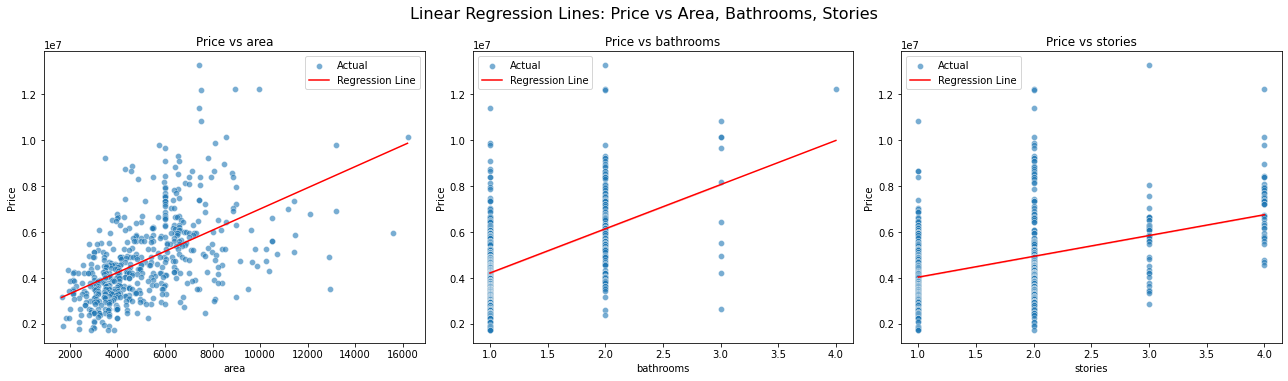

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv(r"C:\Users\Pranav\Downloads\archive (5).zip")  # Replace with actual file
df.dropna(inplace=True)

# Define the features to plot against price
features = ['area', 'bathrooms', 'stories']

# Create subplots
plt.figure(figsize=(18, 5))

for i, feature in enumerate(features):
    # Prepare X and y
    X = df[[feature]]
    y = df['price']

    # Train model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Plot
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=X[feature], y=y, label='Actual', alpha=0.6)
    sns.lineplot(x=X[feature], y=y_pred, color='red', label='Regression Line')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Price vs {feature}')
    plt.legend()

plt.tight_layout()
plt.suptitle('Linear Regression Lines: Price vs Area, Bathrooms, Stories', fontsize=16, y=1.05)
plt.show()


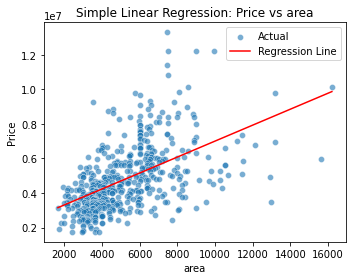

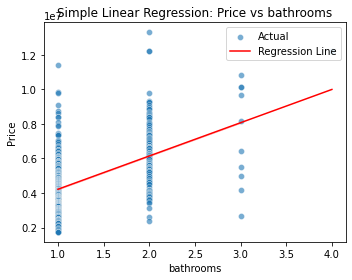

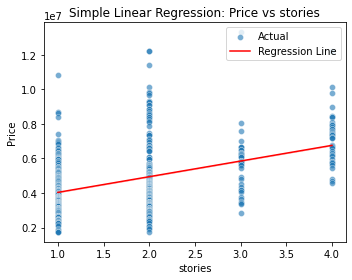

C:\Users\Pranav\AppData\Local\Temp\ipykernel_28372\3161639100.py:107: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\Pranav\AppData\Local\Temp\ipykernel_28372\3161639100.py:107: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\Pranav\anaconda3\anaconda1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Pranav\anaconda3\anaconda1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


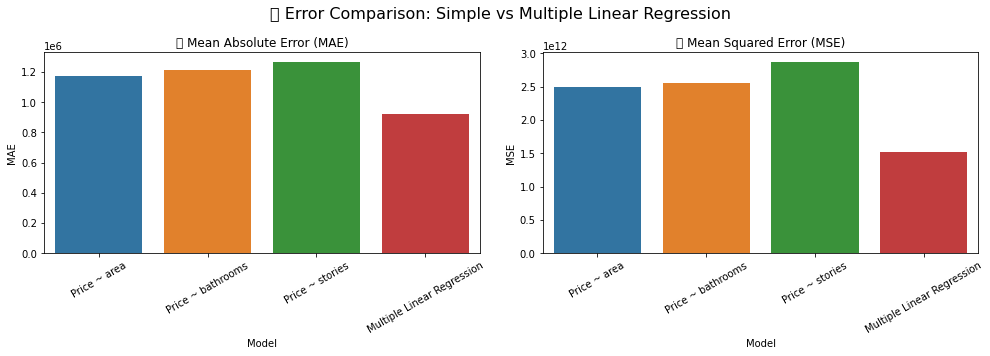


🔹 Error Comparison Table:
                        Model         MAE           MSE    R2
0                Price ~ area  1172305.51  2.488861e+12  0.29
1           Price ~ bathrooms  1210797.21  2.556748e+12  0.27
2             Price ~ stories  1268226.28  2.874023e+12  0.18
3  Multiple Linear Regression   920392.94  1.523019e+12  0.65


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and clean dataset
df = pd.read_csv(r"C:\Users\Pranav\Downloads\archive (5).zip")  # Change path if needed
df.dropna(inplace=True)

# ---------------------------- #
# 📌 1. SIMPLE LINEAR REGRESSION (3 Models)
# ---------------------------- #
simple_features = ['area', 'bathrooms', 'stories']
simple_errors = []

for feature in simple_features:
    X = df[[feature]]
    y = df['price']

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    simple_errors.append({
        'Model': f'Price ~ {feature}',
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })

    # Plotting regression line
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=X[feature], y=y, label='Actual', alpha=0.6)
    sns.lineplot(x=X[feature], y=y_pred, color='red', label='Regression Line')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Simple Linear Regression: Price vs {feature}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------------------------- #
# 📌 2. MULTIPLE LINEAR REGRESSION
# ---------------------------- #

# Encode categorical variables
categorical_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning',
    'prefarea', 'furnishingstatus'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Fit model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
multi_pred = multi_model.predict(X_test)

# Evaluate
multi_mae = mean_absolute_error(y_test, multi_pred)
multi_mse = mean_squared_error(y_test, multi_pred)
multi_r2 = r2_score(y_test, multi_pred)

# Add to error table
simple_errors.append({
    'Model': 'Multiple Linear Regression',
    'MAE': multi_mae,
    'MSE': multi_mse,
    'R2': multi_r2
})

# ---------------------------- #
# 📊 3. COMPARE ERRORS IN 2D BAR CHART
# ---------------------------- #
error_df = pd.DataFrame(simple_errors)

# Plot MAE, MSE side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=error_df, x='Model', y='MAE', ax=axes[0])
axes[0].set_title("📉 Mean Absolute Error (MAE)")
axes[0].tick_params(axis='x', rotation=30)

sns.barplot(data=error_df, x='Model', y='MSE', ax=axes[1])
axes[1].set_title("📉 Mean Squared Error (MSE)")
axes[1].tick_params(axis='x', rotation=30)

plt.suptitle("🔍 Error Comparison: Simple vs Multiple Linear Regression", fontsize=16)
plt.tight_layout()
plt.show()

# Display error comparison table
print("\n🔹 Error Comparison Table:")
print(error_df.round(2))


Original shape: (545, 13), After removing outliers: (463, 13)

🔍 Model Performance After Outlier Removal:
MAE: ₹720,466.25
MSE: ₹9.52e+11
R²: 0.62


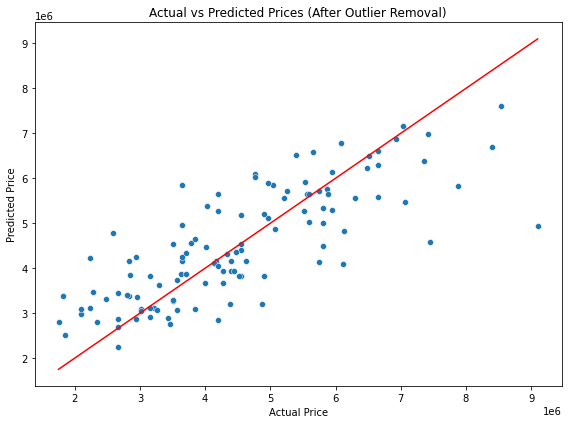

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\Pranav\Downloads\archive (5).zip") # Replace with your dataset path

# Select numeric columns for outlier detection
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Remove outliers using IQR method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original shape: {df.shape}, After removing outliers: {df_clean.shape}")

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n🔍 Model Performance After Outlier Removal:")
print(f"MAE: ₹{mae:,.2f}")
print(f"MSE: ₹{mse:,.2e}")
print(f"R²: {r2:.2f}")

# Plot predictions vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (After Outlier Removal)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # identity line
plt.tight_layout()
plt.show()
